# Eat Safe, Love

## Notebook Set Up

In [3]:
from pymongo import MongoClient
import pandas as pd
from pprint import pprint

In [4]:
# Create an instance of MongoClient
mongo = MongoClient(port=27017)

In [5]:
# assign the uk_food database to a variable name
db = mongo['uk_food']

In [6]:
# review the collections in our database
print(db.list_collection_names())

['establishments']


In [7]:
# review a document in the establishments collection
db.establishments.find_one()

{'_id': ObjectId('678a6abb424358de2d54f34d'),
 'FHRSID': 1043695,
 'ChangesByServerID': 0,
 'LocalAuthorityBusinessID': 'PI/000073616',
 'BusinessName': 'The Pavilion',
 'BusinessType': 'Restaurant/Cafe/Canteen',
 'BusinessTypeID': 1,
 'AddressLine1': 'East Cliff Pavilion',
 'AddressLine2': 'Wear Bay Road',
 'AddressLine3': 'Folkestone',
 'AddressLine4': 'Kent',
 'PostCode': 'CT19 6BL',
 'Phone': '',
 'RatingValue': 5,
 'RatingKey': 'fhrs_5_en-gb',
 'RatingDate': '2018-04-04T00:00:00',
 'LocalAuthorityCode': '188',
 'LocalAuthorityName': 'Folkestone and Hythe',
 'LocalAuthorityWebSite': 'http://www.folkestone-hythe.gov.uk',
 'LocalAuthorityEmailAddress': 'foodteam@folkestone-hythe.gov.uk',
 'scores': {'Hygiene': 5, 'Structural': 5, 'ConfidenceInManagement': 5},
 'SchemeType': 'FHRS',
 'geocode': {'longitude': 1.195625, 'latitude': 51.083812},
 'RightToReply': '',
 'Distance': 4591.765489457773,
 'NewRatingPending': False,
 'meta': {'dataSource': None,
  'extractDate': '0001-01-01T00:00

In [8]:
# assign the collection to a variable
establishments = db['establishments']

## Part 3: Exploratory Analysis
Unless otherwise stated, for each question: 
* Use `count_documents` to display the number of documents contained in the result.
* Display the first document in the results using `pprint`.
* Convert the result to a Pandas DataFrame, print the number of rows in the DataFrame, and display the first 10 rows.

### 1. Which establishments have a hygiene score equal to 20?

In [11]:
# Query to find establishments with a hygiene score of 20
query = {"scores.Hygiene": 20}
results = establishments.find(query)
#Use count_documents to display the number of documents in the result
results_count = establishments.count_documents(query)
print(results_count)
# Display the first document in the results using pprint.
pprint(results[0])

41
{'AddressLine1': '5-6 Southfields Road',
 'AddressLine2': 'Eastbourne',
 'AddressLine3': 'East Sussex',
 'AddressLine4': '',
 'BusinessName': 'The Chase Rest Home',
 'BusinessType': 'Caring Premises',
 'BusinessTypeID': 5,
 'ChangesByServerID': 0,
 'Distance': 4613.888288172291,
 'FHRSID': 110681,
 'LocalAuthorityBusinessID': '4029',
 'LocalAuthorityCode': '102',
 'LocalAuthorityEmailAddress': 'Customerfirst@eastbourne.gov.uk',
 'LocalAuthorityName': 'Eastbourne',
 'LocalAuthorityWebSite': 'http://www.eastbourne.gov.uk/foodratings',
 'NewRatingPending': False,
 'Phone': '',
 'PostCode': 'BN21 1BU',
 'RatingDate': '2021-09-23T00:00:00',
 'RatingKey': 'fhrs_0_en-gb',
 'RatingValue': 0,
 'RightToReply': '',
 'SchemeType': 'FHRS',
 '_id': ObjectId('678a6abe424358de2d550e7f'),
 'geocode': {'latitude': 50.769705, 'longitude': 0.27694},
 'links': [{'href': 'https://api.ratings.food.gov.uk/establishments/110681',
            'rel': 'self'}],
 'meta': {'dataSource': None,
          'extractD

In [12]:
# Convert the result to a Pandas DataFrame
df = pd.DataFrame(results)
# # Display the number of rows in the DataFrame
num_of_row = (len(df))
print(f"Number of rows:{num_of_row}")
# Display the first 10 rows of the DataFrame
df.head(10)

Number of rows:41


,_id,FHRSID,ChangesByServerID,LocalAuthorityBusinessID,BusinessName,BusinessType,BusinessTypeID,AddressLine1,AddressLine2,AddressLine3,...,LocalAuthorityWebSite,LocalAuthorityEmailAddress,scores,SchemeType,geocode,RightToReply,Distance,NewRatingPending,meta,links
0,678a6abe424358de2d550e7f,110681,0,4029,The Chase Rest Home,Caring Premises,5,5-6 Southfields Road,Eastbourne,East Sussex,...,http://www.eastbourne.gov.uk/foodratings,Customerfirst@eastbourne.gov.uk,"{'Hygiene': 20, 'Structural': 20, 'ConfidenceI...",FHRS,"{'longitude': 0.27694, 'latitude': 50.769705}",,4613.888288,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'https://api.ratings...."
1,678a6abe424358de2d551200,612039,0,1970/FOOD,Brenalwood,Caring Premises,5,Hall Lane,Walton-on-the-Naze,Essex,...,http://www.tendringdc.gov.uk/,fhsadmin@tendringdc.gov.uk,"{'Hygiene': 20, 'Structural': 15, 'ConfidenceI...",FHRS,"{'longitude': 1.278721, 'latitude': 51.857536}",,4617.965824,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'https://api.ratings...."
2,678a6abe424358de2d55150a,730933,0,1698/FOOD,Melrose Hotel,Hotel/bed & breakfast/guest house,7842,53 Marine Parade East,Clacton On Sea,Essex,...,http://www.tendringdc.gov.uk/,fhsadmin@tendringdc.gov.uk,"{'Hygiene': 20, 'Structural': 20, 'ConfidenceI...",FHRS,"{'longitude': 1.15927, 'latitude': 51.789429}",,4619.656144,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'https://api.ratings...."
3,678a6abe424358de2d5516f8,172735,0,PI/000023858,Seaford Pizza,Takeaway/sandwich shop,7844,4 High Street,Seaford,East Sussex,...,http://www.lewes-eastbourne.gov.uk/,ehealth.ldc@lewes-eastbourne.gov.uk,"{'Hygiene': 20, 'Structural': 10, 'ConfidenceI...",FHRS,"{'longitude': 0.10202, 'latitude': 50.770885}",,4620.421725,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'https://api.ratings...."
4,678a6abe424358de2d551707,172953,0,PI/000024532,Golden Palace,Restaurant/Cafe/Canteen,1,5 South Street,Seaford,East Sussex,...,http://www.lewes-eastbourne.gov.uk/,ehealth.ldc@lewes-eastbourne.gov.uk,"{'Hygiene': 20, 'Structural': 10, 'ConfidenceI...",FHRS,"{'longitude': 0.101446, 'latitude': 50.770724}",,4620.437179,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'https://api.ratings...."
5,678a6abf424358de2d5520a6,512854,0,12/00816/BUTH,Ashby's Butchers,Retailers - other,4613,777 Southchurch Road,Southend-On-Sea,Essex,...,http://www.southend.gov.uk,EnvironmentalHealth@southend.gov.uk,"{'Hygiene': 20, 'Structural': 20, 'ConfidenceI...",FHRS,"{'longitude': 0.736349, 'latitude': 51.541448}",,4625.565258,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'https://api.ratings...."
6,678a6abf424358de2d5522c7,1537089,0,22/00224/RESTUN,South Sea Express Cuisine,Restaurant/Cafe/Canteen,1,33 Alexandra Street,Southend-on-sea,Essex,...,http://www.southend.gov.uk,EnvironmentalHealth@southend.gov.uk,"{'Hygiene': 20, 'Structural': 20, 'ConfidenceI...",FHRS,"{'longitude': 0.7121671, 'latitude': 51.5350065}",,4626.200132,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'https://api.ratings...."
7,678a6ac2424358de2d5537f2,155648,0,EH/00006058,Golden Palace,Takeaway/sandwich shop,7844,7 London Road,Rayleigh,Essex,...,http://www.rochford.gov.uk,customerservices@rochford.gov.uk,"{'Hygiene': 20, 'Structural': 15, 'ConfidenceI...",FHRS,"{'longitude': 0.602364, 'latitude': 51.591515}",,4632.276890,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'http://api.ratings.f..."
8,678a6ac2424358de2d553c36,1012883,0,17/00110/MIXED/S,The Tulip Tree,Restaurant/Cafe/Canteen,1,3 The Village,Chiddingstone,KENT,...,http://www.sevenoaks.gov.uk/,environmental.health@sevenoaks.gov.uk,"{'Hygiene': 20, 'Structural': 5, 'ConfidenceIn...",FHRS,"{'longitude': 0.146449998021126, 'latitude': 5...",,4633.934041,False,"{'dat

### 2. Which establishments in London have a `RatingValue` greater than or equal to 4?

In [14]:
# Find the establishments with London as the Local Authority and has a RatingValue greater than or equal to 4.
query_london = {"LocalAuthorityName": {"$regex": "London"}, "RatingValue": {"$gte": 4}}
results_london = establishments.find(query_london)
#Use count_documents to display the number of documents in the result
results_count_london = establishments.count_documents(query_london)
# Use count_documents to display the number of documents in the result
print(results_count_london)
# Display the first document in the results using pprint
pprint(results_london[0])

33
{'AddressLine1': 'Oak Apple Farm Building 103 Sheernes Docks',
 'AddressLine2': 'Sheppy Kent',
 'AddressLine3': '',
 'AddressLine4': '',
 'BusinessName': "Charlie's",
 'BusinessType': 'Other catering premises',
 'BusinessTypeID': 7841,
 'ChangesByServerID': 0,
 'Distance': 4627.439467780196,
 'FHRSID': 621707,
 'LocalAuthorityBusinessID': 'PI/000025307',
 'LocalAuthorityCode': '508',
 'LocalAuthorityEmailAddress': 'publicprotection@cityoflondon.gov.uk',
 'LocalAuthorityName': 'City of London Corporation',
 'LocalAuthorityWebSite': 'http://www.cityoflondon.gov.uk/Corporation/homepage.htm',
 'NewRatingPending': False,
 'Phone': '',
 'PostCode': 'ME12',
 'RatingDate': '2021-10-18T00:00:00',
 'RatingKey': 'fhrs_4_en-gb',
 'RatingValue': 4,
 'RightToReply': '',
 'SchemeType': 'FHRS',
 '_id': ObjectId('678a6ac0424358de2d55289a'),
 'geocode': {'latitude': 51.369321, 'longitude': 0.508551},
 'links': [{'href': 'https://api.ratings.food.gov.uk/establishments/621707',
            'rel': 'self

In [15]:
# Convert the result to a Pandas DataFrame
df_london = pd.DataFrame(results_london)
# # Display the number of rows in the DataFrame
num_rows_london= len(df_london)
print(f"Number of rows in df_london:{num_rows_london}")
# Display the first 10 rows of the DataFrame
df_london.head(10)

Number of rows in df_london:33


,_id,FHRSID,ChangesByServerID,LocalAuthorityBusinessID,BusinessName,BusinessType,BusinessTypeID,AddressLine1,AddressLine2,AddressLine3,...,LocalAuthorityWebSite,LocalAuthorityEmailAddress,scores,SchemeType,geocode,RightToReply,Distance,NewRatingPending,meta,links
0,678a6ac0424358de2d55289a,621707,0,PI/000025307,Charlie's,Other catering premises,7841,Oak Apple Farm Building 103 Sheernes Docks,Sheppy Kent,,...,http://www.cityoflondon.gov.uk/Corporation/hom...,publicprotection@cityoflondon.gov.uk,"{'Hygiene': 5, 'Structural': 10, 'ConfidenceIn...",FHRS,"{'longitude': 0.508551, 'latitude': 51.369321}",,4627.439468,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'https://api.ratings...."
1,678a6ac1424358de2d552bc0,1130836,0,PI/000034075,Mv City Cruises Erasmus,Other catering premises,7841,Cherry Garden Pier,Cherry Garden Street Rotherhithe,Charlton,...,http://www.cityoflondon.gov.uk/Corporation/hom...,publicprotection@cityoflondon.gov.uk,"{'Hygiene': 0, 'Structural': 5, 'ConfidenceInM...",FHRS,"{'longitude': 0.249255999922752, 'latitude': 5...",,4627.873179,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'http://api.ratings.f..."
2,678a6ac2424358de2d55370d,293783,0,PI/000002614,Benfleet Motor Yacht Club,Other catering premises,7841,Ferry Road,South Benfleet Essex,,...,http://www.cityoflondon.gov.uk/Corporation/hom...,publicprotection@cityoflondon.gov.uk,"{'Hygiene': 0, 'Structural': 0, 'ConfidenceInM...",FHRS,"{'longitude': 0.561954, 'latitude': 51.543831}",,4631.968418,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'http://api.ratings.f..."
3,678a6ac3424358de2d55450d,1315095,0,PI/000036464,Coombs Catering t/a The Lock and Key,Restaurant/Cafe/Canteen,1,Leslie Ford House,Tilbury,Charlton,...,http://www.cityoflondon.gov.uk/Corporation/hom...,publicprotection@cityoflondon.gov.uk,"{'Hygiene': 0, 'Structural': 5, 'ConfidenceInM...",FHRS,"{'longitude': 0.346336990594864, 'latitude': 5...",,4636.846754,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'http://api.ratings.f..."
4,678a6ac3424358de2d55450e,294474,0,PI/000014647,Tilbury Seafarers Centre,Restaurant/Cafe/Canteen,1,Tenants Row Tilbury Docks,Tilbury Essex,,...,http://www.cityoflondon.gov.uk/Corporation/hom...,publicprotection@cityoflondon.gov.uk,"{'Hygiene': 0, 'Structural': 0, 'ConfidenceInM...",FHRS,"{'longitude': 0.346325, 'latitude': 51.464078}",,4636.847650,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'http://api.ratings.f..."
5,678a6ac3424358de2d554c16,294900,0,PI/000019066,Mv Valulla,Other catering premises,7841,Reeds River Cruises LtdKings ReachRiver Thames...,London,,...,http://www.cityoflondon.gov.uk/Corporation/hom...,publicprotection@cityoflondon.gov.uk,"{'Hygiene': 0, 'Structural': 0, 'ConfidenceInM...",FHRS,"{'longitude': 0.287555, 'latitude': 51.504071}",,4640.460834,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'http://api.ratings.f..."
6,678a6ac6424358de2d556d24,293756,0,PI/000002538,Tereza Joanne,Other catering premises,7841,Funcraft UK Ltd King George V Dock Woolwich Ma...,London,,...,http://www.cityoflondon.gov.uk/Corporation/hom...,publicprotection@cityoflondon.gov.uk,"{'Hygiene': 0, 'Structural': 5, 'ConfidenceInM...",FHRS,"{'longitude': 0.069286, 'latitude': 51.501121}",,4648.301822,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'http://api.ratings.f..."
7,678a6ac7424358de2d5570eb,878523,0,PI/000029844,Brick Lane Brews,Restaurant/Cafe/Canteen,1,Air side London City Airport,London,,...,http://www.cityoflondon.gov.uk/Corporation/hom...,publicprotection@cityoflondon.gov.uk,"{'Hygiene': 10, 'Structural': 5, 'ConfidenceIn...",FHRS,"{'longitude': 0.048006, 'latitude': 51.503733}",,4649.173485,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'http://api.ratings.f..."
8,678a6ac7

### 3. What are the top 5 establishments with a `RatingValue` rating value of 5, sorted by lowest hygiene score, nearest to the new restaurant added, "Penang Flavours"?

In [17]:
# Get latitude and longitude of "Penang Flavours"
penang_flavours = establishments.find_one({'BusinessName': 'Penang Flavours'})

if penang_flavours:
    latitude = penang_flavours['geocode']['latitude']
    longitude = penang_flavours['geocode']['longitude']
else:
    print("Penang Flavours not found!")
    exit()

# Convert to float if necessary
latitude_float = float(latitude) if not isinstance(latitude, float) else latitude
longitude_float = float(longitude) if not isinstance(longitude, float) else longitude

# Degree search range
degree_search = 0.01

# Rating value must equal 5
query = {
    'RatingValue': 5,
    'geocode.latitude': {'$gte': latitude_float - degree_search, '$lte': latitude_float + degree_search},
    'geocode.longitude': {'$gte': longitude_float - degree_search, '$lte': longitude_float + degree_search}
}

# Sort by hygiene score
sort = [('scores.Hygiene', 1)]

# Limit the results to the top 5 establishments
limit = 5

# Execute the query
results_Penang_search = establishments.find(query).sort(sort).limit(limit)

# Convert to a list and print results
result_list = list(results_Penang_search)
from pprint import pprint
pprint(result_list)

[{'AddressLine1': '130 - 132 Plumstead High Street',
  'AddressLine2': '',
  'AddressLine3': 'Plumstead',
  'AddressLine4': 'Greenwich',
  'BusinessName': 'Volunteer',
  'BusinessType': 'Pub/bar/nightclub',
  'BusinessTypeID': 7843,
  'ChangesByServerID': 0,
  'Distance': 4646.965634598608,
  'FHRSID': 694609,
  'LocalAuthorityBusinessID': 'PI/000116619',
  'LocalAuthorityCode': '511',
  'LocalAuthorityEmailAddress': 'health@royalgreenwich.gov.uk',
  'LocalAuthorityName': 'Greenwich',
  'LocalAuthorityWebSite': 'http://www.royalgreenwich.gov.uk',
  'NewRatingPending': False,
  'Phone': '',
  'PostCode': 'SE18 1JQ',
  'RatingDate': '2019-08-05T00:00:00',
  'RatingKey': 'fhrs_5_en-gb',
  'RatingValue': 5,
  'RightToReply': '',
  'SchemeType': 'FHRS',
  '_id': ObjectId('678a6ac6424358de2d5566de'),
  'geocode': {'latitude': 51.4873437, 'longitude': 0.09208},
  'links': [{'href': 'http://api.ratings.food.gov.uk/establishments/694609',
             'rel': 'self'}],
  'meta': {'dataSource': N

In [18]:
# Convert the result to a Pandas DataFrame
top5_df = pd.DataFrame(result_list)
# # Display the number of rows in the DataFrame
num_rows_nearby= len(result_list)
print(f"Number of rows:{num_rows_nearby}")
# Display the first 10 rows of the DataFrame
top5_df.head(10)

Number of rows:5


,_id,FHRSID,ChangesByServerID,LocalAuthorityBusinessID,BusinessName,BusinessType,BusinessTypeID,AddressLine1,AddressLine2,AddressLine3,...,LocalAuthorityWebSite,LocalAuthorityEmailAddress,scores,SchemeType,geocode,RightToReply,Distance,NewRatingPending,meta,links
0,678a6ac6424358de2d5566de,694609,0,PI/000116619,Volunteer,Pub/bar/nightclub,7843,130 - 132 Plumstead High Street,,Plumstead,...,http://www.royalgreenwich.gov.uk,health@royalgreenwich.gov.uk,"{'Hygiene': 0, 'Structural': 0, 'ConfidenceInM...",FHRS,"{'longitude': 0.09208, 'latitude': 51.4873437}",,4646.965635,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'http://api.ratings.f..."
1,678a6ac6424358de2d5566f6,695241,0,PI/000179088,Plumstead Manor Nursery,Caring Premises,5,Plumstead Manor School Old Mill Road,,Plumstead,...,http://www.royalgreenwich.gov.uk,health@royalgreenwich.gov.uk,"{'Hygiene': 0, 'Structural': 0, 'ConfidenceInM...",FHRS,"{'longitude': 0.0859939977526665, 'latitude': ...",,4646.974010,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'http://api.ratings.f..."
2,678a6ac6424358de2d5566f9,694478,0,PI/000086506,Atlantic Fish Bar,Takeaway/sandwich shop,7844,35 Lakedale Road,,Plumstead,...,http://www.royalgreenwich.gov.uk,health@royalgreenwich.gov.uk,"{'Hygiene': 0, 'Structural': 0, 'ConfidenceInM...",FHRS,"{'longitude': 0.0912164, 'latitude': 51.4867296}",,4646.974612,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'http://api.ratings.f..."
3,678a6ac6424358de2d5566b1,695223,0,PI/000178842,Iceland,Retailers - supermarkets/hypermarkets,7840,144 - 146 Plumstead High Street,,Plumstead,...,http://www.royalgreenwich.gov.uk,health@royalgreenwich.gov.uk,"{'Hygiene': 0, 'Structural': 5, 'ConfidenceInM...",FHRS,"{'longitude': 0.0924199968576431, 'latitude': ...",,4646.946071,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'http://api.ratings.f..."
4,678a6ac6424358de2d5566c1,1380578,0,14425,Howe and Co Fish and Chips - Van 17,Mobile caterer,7846,Restaurant And Premises 107A Plumstead High St...,,Plumstead,...,http://www.royalgreenwich.gov.uk,health@royalgreenwich.gov.uk,"{'Hygiene': 0, 'Structural': 0, 'ConfidenceInM...",FHRS,"{'longitude': 0.0925370007753372, 'latitude': ...",,4646.955931,False,"{'dataSource': None, 'extractDate': '0001-01-0...","[{'rel': 'self', 'href': 'http://api.ratings.f..."


### 4. How many establishments in each Local Authority area have a hygiene score of 0?

In [20]:
# Create a pipeline that:
# 1. Matches establishments with a hygiene score of 0
match_query = {'$match': {'scores.Hygiene': 0}}

# 2. Groups the matches by Local Authority
group_query = {'$group': {'_id': "$LocalAuthorityName", 'count': { '$sum': 1 }}}

# 3. Sorts the matches from highest to lowest
sort_values = {'$sort': { 'count': -1 }}
# Put the pipeline together
pipeline = [match_query, group_query, sort_values]

# Run the pipeline through the aggregate method and save the results to a variable
hygiene_score_results = list(establishments.aggregate(pipeline))
# Print the number of documents in the result
print("Number of countries in result: ", len(hygiene_score_results))

# Print the first 10 results
pprint(hygiene_score_results[0:10])


Number of countries in result:  55
[{'_id': 'Thanet', 'count': 1130},
 {'_id': 'Greenwich', 'count': 882},
 {'_id': 'Maidstone', 'count': 713},
 {'_id': 'Newham', 'count': 711},
 {'_id': 'Swale', 'count': 686},
 {'_id': 'Chelmsford', 'count': 680},
 {'_id': 'Medway', 'count': 672},
 {'_id': 'Bexley', 'count': 607},
 {'_id': 'Southend-On-Sea', 'count': 586},
 {'_id': 'Tendring', 'count': 542}]


In [21]:
# Convert the result to a Pandas DataFrame
hygiene_score_df = pd.DataFrame(hygiene_score_results)
# # Display the number of rows in the DataFrame
num_rows_hygiene = len(hygiene_score_df)
print(f"Number of rows:{num_rows_hygiene}")
# Display the first 10 rows of the DataFrame
hygiene_score_df.head(10)

Number of rows:55


,_id,count
0,Thanet,1130
1,Greenwich,882
2,Maidstone,713
3,Newham,711
4,Swale,686
5,Chelmsford,680
6,Medway,672
7,Bexley,607
8,Southend-On-Sea,586
9,Tendring,542


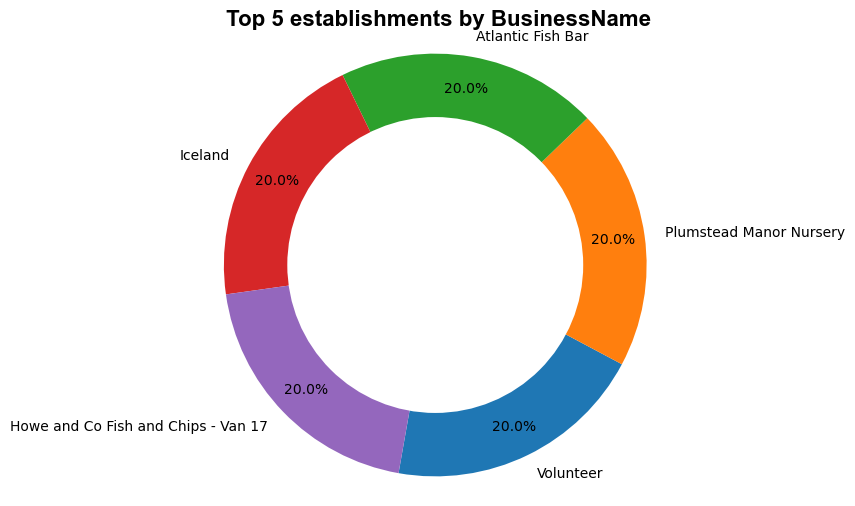

In [22]:

import matplotlib.pyplot as plt

# Data Viz Recipe
data = top5_df.BusinessName.value_counts().sort_values()

# Change Canvas Size
plt.figure(figsize=(6, 6))

# Create a basic plot
plt.pie(data.values, labels=data.index, autopct="%1.1f%%", shadow=False, startangle=260, pctdistance=0.85)

# Customizations
# DONUT
centre_circle = plt.Circle((0,0), 0.70, fc='white')  # Adjust 0.70 for hole size
plt.gca().add_artist(centre_circle)

# Change colors
# Add in reference lines
# Add Labels/Title
plt.title(f" Top 5 establishments by BusinessName", fontweight="bold", fontsize=16, fontfamily="Arial")

# Set X/Y Limits
plt.axis("equal")

# Show/Save the Graph
plt.show()